# Import Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# Load Data

In [58]:
data = pd.read_csv('Datasets/Exercise-CarData.csv', index_col=[0], na_values=['??', '????'])
print("\nData :\n", data)


Data :
       Price   Age       KM FuelType     HP  MetColor  Automatic    CC  Doors  \
0     13500  23.0  46986.0   Diesel   90.0       1.0          0  2000  three   
1     13750  23.0  72937.0   Diesel   90.0       1.0          0  2000      3   
2     13950  24.0  41711.0   Diesel   90.0       NaN          0  2000      3   
3     14950  26.0  48000.0   Diesel   90.0       0.0          0  2000      3   
4     13750  30.0  38500.0   Diesel   90.0       0.0          0  2000      3   
...     ...   ...      ...      ...    ...       ...        ...   ...    ...   
1431   7500   NaN  20544.0   Petrol   86.0       1.0          0  1300      3   
1432  10845  72.0      NaN   Petrol   86.0       0.0          0  1300      3   
1433   8500   NaN  17016.0   Petrol   86.0       0.0          0  1300      3   
1434   7250  70.0      NaN      NaN   86.0       1.0          0  1300      3   
1435   6950  76.0      1.0   Petrol  110.0       0.0          0  1600      5   

      Weight  
0       1165  


# Converting string to numerics

In [59]:
str_to_num_dictionary = {"zero": '0', "one": '1', "two": '2', "three": '3', "four": '4', "five": '5', "six": '6',
                         "seven": '7', "eight": '8', "nine": '9', "ten": '10'}

for i in str_to_num_dictionary.keys():
    data['Doors'].replace(i, str_to_num_dictionary[i], inplace=True)
data["Doors"] = pd.to_numeric(data["Doors"])
print("\n\n Data :\n", data)



 Data :
       Price   Age       KM FuelType     HP  MetColor  Automatic    CC  Doors  \
0     13500  23.0  46986.0   Diesel   90.0       1.0          0  2000      3   
1     13750  23.0  72937.0   Diesel   90.0       1.0          0  2000      3   
2     13950  24.0  41711.0   Diesel   90.0       NaN          0  2000      3   
3     14950  26.0  48000.0   Diesel   90.0       0.0          0  2000      3   
4     13750  30.0  38500.0   Diesel   90.0       0.0          0  2000      3   
...     ...   ...      ...      ...    ...       ...        ...   ...    ...   
1431   7500   NaN  20544.0   Petrol   86.0       1.0          0  1300      3   
1432  10845  72.0      NaN   Petrol   86.0       0.0          0  1300      3   
1433   8500   NaN  17016.0   Petrol   86.0       0.0          0  1300      3   
1434   7250  70.0      NaN      NaN   86.0       1.0          0  1300      3   
1435   6950  76.0      1.0   Petrol  110.0       0.0          0  1600      5   

      Weight  
0       1165 

# Converting String Data to Labels

In [60]:
le = LabelEncoder()
data['FuelType'] = le.fit_transform(data['FuelType'])
print("\n\n Data :\n", data)



 Data :
       Price   Age       KM  FuelType     HP  MetColor  Automatic    CC  Doors  \
0     13500  23.0  46986.0         1   90.0       1.0          0  2000      3   
1     13750  23.0  72937.0         1   90.0       1.0          0  2000      3   
2     13950  24.0  41711.0         1   90.0       NaN          0  2000      3   
3     14950  26.0  48000.0         1   90.0       0.0          0  2000      3   
4     13750  30.0  38500.0         1   90.0       0.0          0  2000      3   
...     ...   ...      ...       ...    ...       ...        ...   ...    ...   
1431   7500   NaN  20544.0         2   86.0       1.0          0  1300      3   
1432  10845  72.0      NaN         2   86.0       0.0          0  1300      3   
1433   8500   NaN  17016.0         2   86.0       0.0          0  1300      3   
1434   7250  70.0      NaN         3   86.0       1.0          0  1300      3   
1435   6950  76.0      1.0         2  110.0       0.0          0  1600      5   

      Weight  
0

# Imputation with mean values

In [61]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
columns = data.columns
index = data.index
data = pd.DataFrame(imputer.fit_transform(data))
data.columns = columns
data.index = index
print("\nData :\n", data)


Data :
         Price        Age            KM  FuelType     HP  MetColor  Automatic  \
0     13500.0  23.000000  46986.000000       1.0   90.0  1.000000        0.0   
1     13750.0  23.000000  72937.000000       1.0   90.0  1.000000        0.0   
2     13950.0  24.000000  41711.000000       1.0   90.0  0.674961        0.0   
3     14950.0  26.000000  48000.000000       1.0   90.0  0.000000        0.0   
4     13750.0  30.000000  38500.000000       1.0   90.0  0.000000        0.0   
...       ...        ...           ...       ...    ...       ...        ...   
1431   7500.0  55.672156  20544.000000       2.0   86.0  1.000000        0.0   
1432  10845.0  72.000000  68647.239972       2.0   86.0  0.000000        0.0   
1433   8500.0  55.672156  17016.000000       2.0   86.0  0.000000        0.0   
1434   7250.0  70.000000  68647.239972       3.0   86.0  1.000000        0.0   
1435   6950.0  76.000000      1.000000       2.0  110.0  0.000000        0.0   

          CC  Doors  Weight  


# Feature selection

In [62]:
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500.0,23.0,46986.0,1.0,90.0,1.000000,0.0,2000.0,3.0,1165.0
1,13750.0,23.0,72937.0,1.0,90.0,1.000000,0.0,2000.0,3.0,1165.0
2,13950.0,24.0,41711.0,1.0,90.0,0.674961,0.0,2000.0,3.0,1165.0
3,14950.0,26.0,48000.0,1.0,90.0,0.000000,0.0,2000.0,3.0,1165.0
4,13750.0,30.0,38500.0,1.0,90.0,0.000000,0.0,2000.0,3.0,1170.0


             Price       Age        KM  FuelType        HP  MetColor  \
Price     1.000000 -0.845111 -0.565016  0.022730  0.308414  0.107943   
Age      -0.845111  1.000000  0.495199  0.033599 -0.152946 -0.091331   
KM       -0.565016  0.495199  1.000000 -0.356238 -0.332984 -0.088587   
FuelType  0.022730  0.033599 -0.356238  1.000000  0.304205  0.021381   
HP        0.308414 -0.152946 -0.332984  0.304205  1.000000  0.060990   

          Automatic        CC     Doors    Weight  
Price      0.033081  0.165067  0.185326  0.581198  
Age        0.030931 -0.116255 -0.151785 -0.442055  
KM        -0.080743  0.296281 -0.036021 -0.025758  
FuelType   0.073860 -0.499114 -0.018434 -0.355254  
HP         0.013753  0.053466  0.096938  0.086214  


<AxesSubplot:>

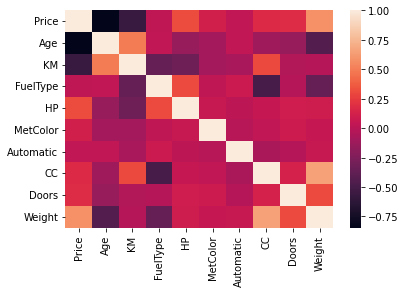

In [63]:
#feature selection
corr = data.corr()
print(corr.head())
sns.heatmap(corr)

In [64]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [65]:
selected_columns = data.columns[columns]
selected_columns.shape

(10,)

In [66]:
data = data[selected_columns]
print(data)

        Price        Age            KM  FuelType     HP  MetColor  Automatic  \
0     13500.0  23.000000  46986.000000       1.0   90.0  1.000000        0.0   
1     13750.0  23.000000  72937.000000       1.0   90.0  1.000000        0.0   
2     13950.0  24.000000  41711.000000       1.0   90.0  0.674961        0.0   
3     14950.0  26.000000  48000.000000       1.0   90.0  0.000000        0.0   
4     13750.0  30.000000  38500.000000       1.0   90.0  0.000000        0.0   
...       ...        ...           ...       ...    ...       ...        ...   
1431   7500.0  55.672156  20544.000000       2.0   86.0  1.000000        0.0   
1432  10845.0  72.000000  68647.239972       2.0   86.0  0.000000        0.0   
1433   8500.0  55.672156  17016.000000       2.0   86.0  0.000000        0.0   
1434   7250.0  70.000000  68647.239972       3.0   86.0  1.000000        0.0   
1435   6950.0  76.000000      1.000000       2.0  110.0  0.000000        0.0   

          CC  Doors  Weight  
0     200

# Scaling and transformation

In [67]:
data = data.iloc[:, :-1].values
scaler = MinMaxScaler()
std = StandardScaler()
data[:,0:3] = std.fit_transform(scaler.fit_transform(data[:,0:3]))
data[:,4:6] = std.fit_transform(scaler.fit_transform(data[:,4:6]))
data[:,7:9] = std.fit_transform(scaler.fit_transform(data[:,7:9]))
print("Dataset after preprocessing\n\n",data)

Dataset after preprocessing

 [[ 7.63762679e-01 -1.82280225e+00 -5.83476268e-01 ...  0.00000000e+00
   2.31497633e+00 -1.08513865e+00]
 [ 8.32714853e-01 -1.82280225e+00  1.15550780e-01 ...  0.00000000e+00
   2.31497633e+00 -1.08513865e+00]
 [ 8.87876592e-01 -1.76701156e+00 -7.25565886e-01 ...  0.00000000e+00
   2.31497633e+00 -1.08513865e+00]
 ...
 [-6.15280799e-01 -4.89326897e-16 -1.39076079e+00 ...  0.00000000e+00
  -1.42599356e+00 -1.08513865e+00]
 [-9.60041669e-01  7.99360384e-01  0.00000000e+00 ...  0.00000000e+00
  -1.42599356e+00 -1.08513865e+00]
 [-1.04278428e+00  1.13410455e+00 -1.84908399e+00 ...  0.00000000e+00
   1.77279249e-01  1.01494100e+00]]
